<img src="https://github.com/Unidata/MetPy/raw/main/docs/_static/metpy_150x150.png" width=150 alt="MetPy logo"></img>
<img src="https://github.com/Unidata/MetPy/raw/main/docs/_static/unidata_150x150.png" width=150 alt="Unidata logo"></img>

# MetPy Tutorial - Overview
---

## Introduction

[MetPy](https://github.com/Unidata/MetPy) is a collection of tools in Python for reading, visualizing, and performing calculations with weather data built on and within the scientific Python ecosystem and an open development model. MetPy thrives on community contributions, feedback, guidance, and expertise.

This tutorial will provide an overview of MetPy's wide breadth of functionality, as well as take a deeper dive into demonstrating how MetPy might be useful for your work!

## Prerequisites

Depending on which of the tools within MetPy you come to rely on, it may be necessary to be familiar with a variety of other libraries in the scientific Python ecosystem,

| Concepts | Importance | Notes |
| --- | --- | --- |
| [Xarray](https://foundations.projectpythia.org/core/xarray.html) | Necessary | **Strongly encouraged** and sometimes required for complete MetPy functionality |
| [Pint](https://pint.readthedocs.io/en/stable/tutorial.html) | Necessary | Nearly all of MetPy relies on this library for unit-correctness |
| [NumPy](https://foundations.projectpythia.org/core/numpy.html) | Helpful | Calculations rely on NumPy functionality and interfaces |
| [SciPy](https://docs.scipy.org/doc/scipy/tutorial/general.html) | Helpful | Scipy is used for a variety of advanced calculations and interpolation |
| [Matplotlib](https://foundations.projectpythia.org/core/matplotlib/matplotlib.html) | Helpful | MetPy's suite of plotting tools are all built upon Matplotlib |
| [Pandas](https://foundations.projectpythia.org/core/pandas/pandas.html) | Helpful | Particularly for METAR and a few other unique data formats |

---

## Imports

In [ ]:
import metpy
import os
os.environ['TEST_DATA_DIR']="/tmp" # for metpy to grab data on the jupyterhub
os.environ['MPLCONFIGDIR']="/tmp" # for matplotlib on jupyterhub

In [ ]:
metpy.__version__

In [ ]:
metpy.calc.potential_temperature?

![](images/docs_ref.png "MetPy documentation reference guide")

In [ ]:
import metpy.units
import metpy.calc
import metpy.interpolate
import metpy.plots
import metpy.io

In [ ]:
metpy.calc.potential_temperature?

---
# Reading files

`metpy.io` contains various tools for reading some special meteorological data formats. Notably, these tools can allow you to explore
 - METARs, and files full of them!
 - GEMPAK formatted surface, sounding, or gridded data
 - NEXRAD Level 2 and Level 3 files
 - GINI satellite files


## Imports

In [ ]:
from metpy.io import GempakSounding, parse_metar_file, Level3File
from metpy.units import pandas_dataframe_to_unit_arrays

## METAR
For parsing [entire files](unidata.github.io/MetPy/latest/api/generated/metpy.io.parse_metar_file.html) or individual [text reports](https://unidata.github.io/MetPy/latest/api/generated/metpy.io.parse_metar_to_dataframe.html) into `pandas.DataFrame`s.

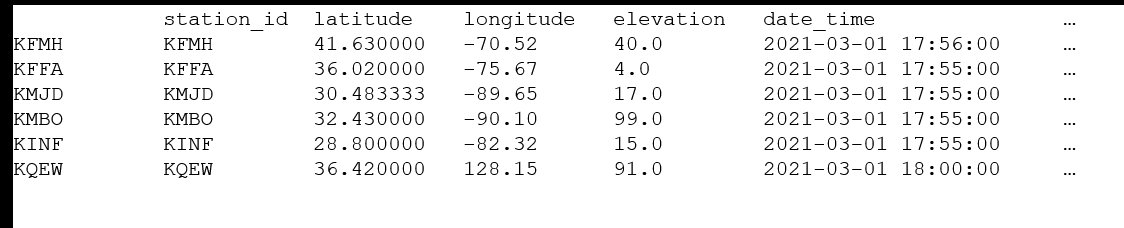

In [ ]:
df = parse_metar_file('data/metar_20190701_1200.txt')
df

In [ ]:
pandas_dataframe_to_unit_arrays(df)

## Gempak

In [ ]:
gso = GempakSounding('data/gem_model_mrg.snd').snxarray()
gso

## NEXRAD

In [ ]:
f = Level3File('data/KOUN_SDUS54_N0QTLX_201305202016')
f

---
# Calculations

`metpy.calc` is a large suite of a variety of unit-aware meteorological calculations loosely gathered in the following categories,
 - Dry and Moist thermodynamics
 - Sounding calculations and indices
 - Boundary layer, calulcations related to turbulence
 - Core mathematics, including derivatives and deltas
 - Heat/chill indices
 - Standard atmosphere and height/pressure conversion
 - Smoothing via interpolation or filtering
 - Miscellaneous!
 
Separately, `metpy.interpolate` contains tools for interpolation for grids, points, profiles, slices, and more. These rely on a variety of SciPy interpolation tools or internally-developed routines.


## Imports

In [ ]:
import metpy.calc as mpcalc
import metpy.interpolate

## [Meteorological calculations](https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html)

In [ ]:
dir(mpcalc)

## [Interpolation](https://unidata.github.io/MetPy/latest/api/generated/metpy.interpolate.html)

In [ ]:
dir(metpy.interpolate)

---
# Units and xarray

The core of this presentation is to introduce to you the required usage of the [Pint](https://pint.readthedocs.io/en/stable/)-based `metpy.units` for making MetPy's calculations unit-aware and correct! Understanding Pint, while required, can also enable for you a lot of convenience and sparing of headaches moving forward.

Similarly, MetPy now heavily relies on [xarray](https://docs.xarray.dev/en/stable/). For some functionality, xarray is required. However, for most of MetPy, xarray instead can be used for convenience and speed in your day-to-day science.


## Imports

In [ ]:
import metpy.calc as mpcalc
import numpy as np
import xarray as xr

from metpy.units import units

For this, note that **any** import of `metpy` will enable access to the xarray accessors, which we'll cover below.

## Pint

The unit registry encapsulates all of the available units, as well as any pertinent settings.
The registry also understands unit prefixes and suffixes; this allows the registry to
understand `'kilometer'` and `'meters'` in addition to the base `'meter'` unit.

In general, using units is only a small step on top of using the `numpy.ndarray`
object.

### Adding Units to Data
The easiest way to attach units to an array (or integer, float, etc.) is to multiply by the
units:



In [ ]:
distance = np.arange(1, 5) * units.meters
distance

In [ ]:
distance = np.arange(1, 5) * units('m')
distance

It is also possible to directly construct a `pint.Quantity`, with a full units string:



In [ ]:
time = units.Quantity(np.arange(2, 10, 2), 'sec')
time

Where defining units via strings, as in the previous two cells, you can specify more complicated compound units that Pint can directly parse,

In [ ]:
velocity = 15 * units('m / s')
velocity

Units support a variety of operations,

In [ ]:
time + time

In [ ]:
distance * distance

In [ ]:
distance / time

In [ ]:
distance - time

and a suite of helpful conversion tools:

In [ ]:
(1 * units.inch).to(units.mm)

## Units in MetPy Calculations

We'll explore this further when we dive into today's exercise, but let's introduce one of MetPy's calculations, `metpy.calc.dewpoint_from_relative_humidity`, to show units in action.

In [ ]:
temperature = 73.2 * units.degF
rh = 64 * units.percent
dewpoint = mpcalc.dewpoint_from_relative_humidity(temperature, rh)
dewpoint

## Xarray

MetPy also provides DataArray and Dataset *accessors*, which are collections of methods and properties under the `.metpy` name for coordinate/CRS and unit operations.

Let's open some sample data to work with.

In [ ]:
# Open the netCDF file as a xarray Dataset
data = xr.open_dataset('data/irma_gfs_example.nc')

# View a summary of the Dataset
data

In [ ]:
temperature = data['Temperature_isobaric']
temperature

### Coordinates and Coordinate Reference Systems

MetPy's first set of helpers comes with identifying *coordinate types*. In a given dataset,
coordinates can have a variety of different names and yet refer to the same type (such as
"isobaric1" and "isobaric3" both referring to vertical isobaric coordinates). Following
CF conventions, as well as using some fall-back regular expressions, MetPy can
systematically identify coordinates of the following types:

- time
- vertical
- latitude
- y
- longitude
- x

When identifying a single coordinate, it is best to use the property directly associated
with that type



In [ ]:
temperature.metpy.time

These coordinate type aliases can also be used in MetPy's wrapped `.sel` and `.loc`
for indexing and selecting on `DataArray`s. For example, to access 500 hPa heights at
1800Z,

In [ ]:
heights = data['Geopotential_height_isobaric'].metpy.sel(
    time='2017-09-05 18:00',
    vertical=50000.
)

We will explore further ways MetPy allows units and xarray to help each other out in just a moment, but here's a sneak peek:

In [ ]:
data['Geopotential_height_isobaric'].metpy.sel(vertical=500 * units.hPa)

Beyond just the coordinates themselves, a common need for both calculations with and plots
of geospatial data is knowing the coordinate reference system (CRS) on which the horizontal
spatial coordinates are defined. MetPy follows the [CF Conventions](http://cfconventions.org/Data/cf-conventions/cf-conventions-1.8/cf-conventions.html#grid-mappings-and-projections)
for its CRS definitions, which it then caches on the `metpy_crs` coordinate in order for
it to persist through calculations and other array operations. There are two ways to do so
in MetPy:

First, if your dataset is already conforming to the CF Conventions, it will have a grid
mapping variable that is associated with the other data variables by the `grid_mapping`
attribute. This is automatically parsed via the `.parse_cf()` method:



In [ ]:
# Parse full dataset
data_parsed = data.metpy.parse_cf()

# Parse subset of dataset
data_subset = data.metpy.parse_cf([
    'u-component_of_wind_isobaric',
    'v-component_of_wind_isobaric',
    'Vertical_velocity_pressure_isobaric'
])

# Parse single variable
relative_humidity = data.metpy.parse_cf('Relative_humidity_isobaric')
relative_humidity

Notice the newly added ``metpy_crs`` non-dimension coordinate. Now how can we use this in
practice? For individual ``DataArrays``\s, we can access the cartopy and pyproj objects
corresponding to this CRS:



In [ ]:
# Cartopy CRS, useful for plotting
relative_humidity.metpy.cartopy_crs

In [ ]:
# pyproj CRS, useful for projection transformations and forward/backward azimuth and great
# circle calculations
relative_humidity.metpy.pyproj_crs

If your dataset doesn't have a CF-conforming grid mapping variable, you can manually specify
the CRS using the ``.assign_crs()` method. Please check out the [documentation](https://unidata.github.io/MetPy/latest/tutorials/xarray_tutorial.html#non-compliant-dataset-example) for more information.

### Units
By relying on xarray, Pint, and some of its own magic, MetPy enables some new unit-based convenience when working with xarray! Let's shrink one of our DataArrays to explore.

In [ ]:
temp_ts = temperature.metpy.sel(
    vertical=500 * units.hPa,
    latitude=45 * units.degrees,
    longitude=290 * units.degrees
)

temp_ts

In [ ]:
temp_ts.metpy.units

With that, we can convert the units of the data contained within our DataArray,

In [ ]:
temp_ts.metpy.convert_units('degF')

We can also control our underlying Pint integration. This is useful or necessary in some specific cases, which we won't explore in depth today.

In [ ]:
temp_quantified = temp_ts.metpy.quantify()
temp_quantified

In [ ]:
temp_quantified.metpy.dequantify()

Finally, if we _only_ need the underlying data pre-massaged into a separate Pint Quantity for us, 

In [ ]:
temp_ts.metpy.unit_array

For more information, check out [this section](https://unidata.github.io/MetPy/latest/tutorials/xarray_tutorial.html#units) of our MetPy with xarray tutorial.

### Calculations

MetPy's xarray integration extends to its calculation suite as well. Most grid-capable
calculations (such as thermodynamics, kinematics, and smoothers) fully support xarray
`DataArray`s by accepting them as inputs, returning them as outputs, and automatically
using the attached coordinate data/metadata to determine grid arguments.

In [ ]:
u_g, v_g = mpcalc.geostrophic_wind(heights)
u_g

---
# Plots

`metpy.plots` contains a variety of tools to either enable creation of unique meteorological plots otherwise difficult or time-consuming to re-create in Python,
 - SkewTs
 - Hodographs
 - Surface and upper-air observation station model plots

or tools to make day-to-day scientific exploration easier, more convenient, or more accessible to those with a variety of backgrounds in meteorology and computing. This is primarily enabled through our *Declarative* plotting interface.


## Imports

In [ ]:
from datetime import datetime, timedelta

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
import pandas as pd

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from metpy.io import parse_metar_file
from metpy.plots import current_weather, sky_cover, Hodograph, SkewT, StationPlot, PlotGeometry, PlotObs, MapPanel, PanelContainer
from metpy.units import units

## [Station Plots](https://unidata.github.io/MetPy/latest/examples/plots/Station_Plot.html#sphx-glr-examples-plots-station-plot-py)

For plotting Meteorological station models for surface or upper-air observations.

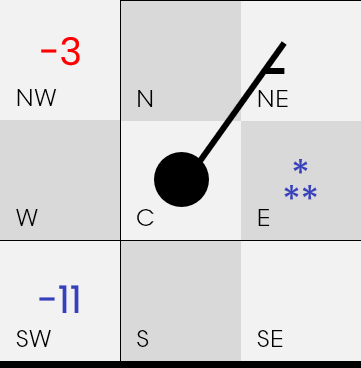

In [ ]:
data = parse_metar_file('data/metar_20190701_1200.txt')

data = data.dropna(how='any', subset=['wind_direction', 'wind_speed'])

In [ ]:
proj = ccrs.LambertConformal(central_longitude=-95, central_latitude=35,
                             standard_parallels=[35])

point_locs = proj.transform_points(ccrs.PlateCarree(), data['longitude'].values,
                                   data['latitude'].values)

data = data[mpcalc.reduce_point_density(point_locs, 300000.)]

In [ ]:
fig = plt.figure(figsize=(20, 10))

ax = fig.add_subplot(1, 1, 1, projection=proj)

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.BORDERS)

ax.set_extent((-118, -73, 23, 50))


# Start the station plot by specifying the axes to draw on, as well as the
# lon/lat of the stations (with transform). We also the fontsize to 12 pt.
stationplot = StationPlot(ax, data['longitude'].values, data['latitude'].values,
                          clip_on=True, transform=ccrs.PlateCarree(), fontsize=12)

# Plot the temperature and dew point to the upper and lower left, respectively, of
# the center point. Each one uses a different color.
stationplot.plot_parameter('NW', data['air_temperature'].values, color='red')
stationplot.plot_parameter('SW', data['dew_point_temperature'].values,
                           color='darkgreen')

# A more complex example uses a custom formatter to control how the sea-level pressure
# values are plotted. This uses the standard trailing 3-digits of the pressure value
# in tenths of millibars.
stationplot.plot_parameter('NE', data['air_pressure_at_sea_level'].values,
                           formatter=lambda v: format(10 * v, '.0f')[-3:])

# Plot the cloud cover symbols in the center location.
stationplot.plot_symbol('C', data['cloud_coverage'].values, sky_cover)

# Same this time, but plot current weather to the left of center.
stationplot.plot_symbol('W', data['current_wx1_symbol'].values, current_weather)

# Add wind barbs
stationplot.plot_barb(data['eastward_wind'].values, data['northward_wind'].values)

# Also plot the actual text of the station id. Instead of cardinal directions,
# plot further out by specifying a location of 2 increments in x and 0 in y.
stationplot.plot_text((2, 0), data['station_id'].values)

plt.show()

## Declarative Plotting

### [Surface station plots](https://unidata.github.io/MetPy/latest/examples/plots/surface_declarative.html#sphx-glr-examples-plots-surface-declarative-py), again?

In [ ]:
# Plotting the Observations using a 15 minute time window for surface observations
obs = PlotObs()
obs.data = data
obs.time = datetime(2022, 5, 1, 12)
obs.time_window = timedelta(minutes=15)
obs.level = None
obs.fields = ['air_temperature',
              'dew_point_temperature',
              'air_pressure_at_sea_level',
              'cloud_coverage',
              'current_wx1_symbol']
obs.locations = ['NW', 'SW', 'NE', 'C', 'W']
obs.colors = ['red', 'green', 'black', 'black', 'blue']
obs.formats = [None, None, lambda v: format(10 * v, '.0f')[-3:], 'sky_cover',
               'current_weather']
obs.vector_field = ('eastward_wind', 'northward_wind')
obs.reduce_points = 1

# Add map features for the particular panel
panel = MapPanel()
panel.layout = (1, 1, 1)
panel.area = 'ga'
panel.projection = ccrs.PlateCarree()
panel.layers = ['coastline', 'borders', 'states']
panel.plots = [obs]

# Collecting panels for complete figure
pc = PanelContainer()
pc.size = (10, 10)
pc.panels = [panel]

# Showing the results
pc.show()

### [PlotGeometry](https://unidata.github.io/MetPy/latest/examples/plots/spc_convective_outlook.html#sphx-glr-examples-plots-spc-convective-outlook-py)

... and we'll save that SkewT for last :)

---

## Resources and references

 - [MetPy documentation](https://unidata.github.io/MetPy/latest/index.html)
 - [MetPy GitHub repository](https://github.com/Unidata/MetPy/)
 - [MetPy support overview](https://unidata.github.io/MetPy/latest/userguide/SUPPORT.html)
     - Ask questions on StackOverflow with the `[metpy]` tag!
     - [GitHub discussions](https://github.com/Unidata/MetPy/discussions) for Q&A, general discussion, announcements, and more
     - [MetPy Gitter](https://gitter.im/Unidata/MetPy) for text chat, discussion, and support
     - [@MetPy](https://twitter.com/MetPy) on Twitter
     - [support-python@unidata.ucar.edu](mailto:support-python@unidata.ucar.edu) for support and [python-users mailing list signup](https://www.unidata.ucar.edu/support/#mailinglists) for announcements, etc.
